<a href="https://colab.research.google.com/github/Juribe7980/Project-1/blob/main/Project_2_part_4(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wines of Spain

by Jessica Uribe

Context
This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.

Content
The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. The was collected by me using web scraping from different sources (from wine specialized pages to supermarkets). Please acknowledge the hard work to obtain and create this dataset, you can upvote it if you find it useful to use on your projects :)

If the dataset becomes popular I will probably try to create a bigger version with wines from other countries and a wider spectrum of ratings.



Attribute Information




winery: Winery name

wine: Name of the wine

year: Year in which the grapes were harvested

rating: Average rating given to the wine by the users [from 1-5]

num_reviews: Number of users that reviewed the wine

country: Country of origin [Spain]

region: Region of the wine

price: Price in euros [€]

type: Wine variety

body: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]

acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

Source

https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset


In [2]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt
## seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

## Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

## Regression Metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report



## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
import warnings
warnings.simplefilter('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Week 5(JJ) Regression and classification/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [5]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 7500 rows, and 11 columns.
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable.


In [6]:
#Decided to drop wiery since there is the only value in the column
df.drop(columns='country', inplace=True)


In [7]:
# checking null values
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

Identified null values on the year column

In [8]:
df['year']


0       2013
1       2018
2       2009
3       1999
4       1996
        ... 
7495    2016
7496    2018
7497    2017
7498    2011
7499    2016
Name: year, Length: 7500, dtype: object

In [9]:
df['year'].value_counts(normalize = True)

2011    0.158709
2016    0.119632
2015    0.114697
2018    0.113364
2017    0.097493
          ...   
1953    0.000133
1972    0.000133
1974    0.000133
1931    0.000133
1925    0.000133
Name: year, Length: 71, dtype: float64

In [10]:
counts = df['year'].value_counts(normalize = True)

Any year that have less than 5% of occurance "frequency will be removed" for that reason need to filter down the years

In [11]:
counts > .05

2011     True
2016     True
2015     True
2018     True
2017     True
        ...  
1953    False
1972    False
1974    False
1931    False
1925    False
Name: year, Length: 71, dtype: bool

Filter the data for that purpose

In [12]:
year_filter = counts > .05

In [13]:
counts.loc[year_filter]

2011    0.158709
2016    0.119632
2015    0.114697
2018    0.113364
2017    0.097493
2012    0.070419
2020    0.063217
2014    0.050147
Name: year, dtype: float64

In [14]:
good_years = counts.loc[year_filter].index
good_years

Index(['2011', '2016', '2015', '2018', '2017', '2012', '2020', '2014'], dtype='object')

In [15]:
#Any year that have less than 5% of occurance "frequency will be removed"
df= df[df['year'].isin (good_years)]

df['year'].value_counts().sort_index()

2011    1190
2012     528
2014     376
2015     860
2016     897
2017     731
2018     850
2020     474
Name: year, dtype: int64

In [16]:
#Convert year to categorical
df['year'] = df['year'].astype('object')

Binning the Target

In [17]:
df['rating'].head()

1     4.9
8     4.8
9     4.8
10    4.8
11    4.8
Name: rating, dtype: float64

In [18]:
Three_stars = [4.2, 4.3]
Four_stars = [4.4, 4.5, 4.6]
Five_stars = [4.7, 4.8, 4.9]

In [19]:
def bin_rating(X):

  if X in Three_stars:
    return 0

  elif X in Four_stars: 

    return 1

  else:
    return  2
df['rating'] = df['rating'].apply(bin_rating)
df.head()


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
1,Artadi,Vina El Pison,2018,2,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,2,643,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,2,630,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0
10,Vega Sicilia,Unico Reserva Especial Edicion,2016,2,591,Ribera del Duero,514.85,Ribera Del Duero Red,5.0,3.0
11,Pago de Carraovejas,El Anejon,2016,2,454,Ribera del Duero,105.15,Ribera Del Duero Red,5.0,3.0


Checking for missing values

In [20]:
df.isna().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
region            0
price             0
type            510
body           1004
acidity        1004
dtype: int64

In [21]:
# change the column to only red and white wines so that we can reduce the possiblities or the categories
# This is an importatn feature engineerign step!!! 
df.type.value_counts()

Rioja Red               1790
Ribera Del Duero Red    1224
Red                      808
Priorat Red              580
Tempranillo              265
Albarino                 236
Mencia                   232
Rioja White               83
Toro Red                  51
Grenache                  32
Verdejo                   22
Montsant Red              15
Monastrell                14
Syrah                     12
Chardonnay                11
Cava                      11
Cabernet Sauvignon         6
Pedro Ximenez              2
Sparkling                  1
Sauvignon Blanc            1
Name: type, dtype: int64

I see there are missing values in type, acidity and body. 
Those will be taking care of with Simple imputer. Type will be fill with most frequent values, body and acidity will be fill with mean. 

In [22]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['winery'])
 
# printing label
label

array([ 28, 358, 358, ..., 269, 255, 327])

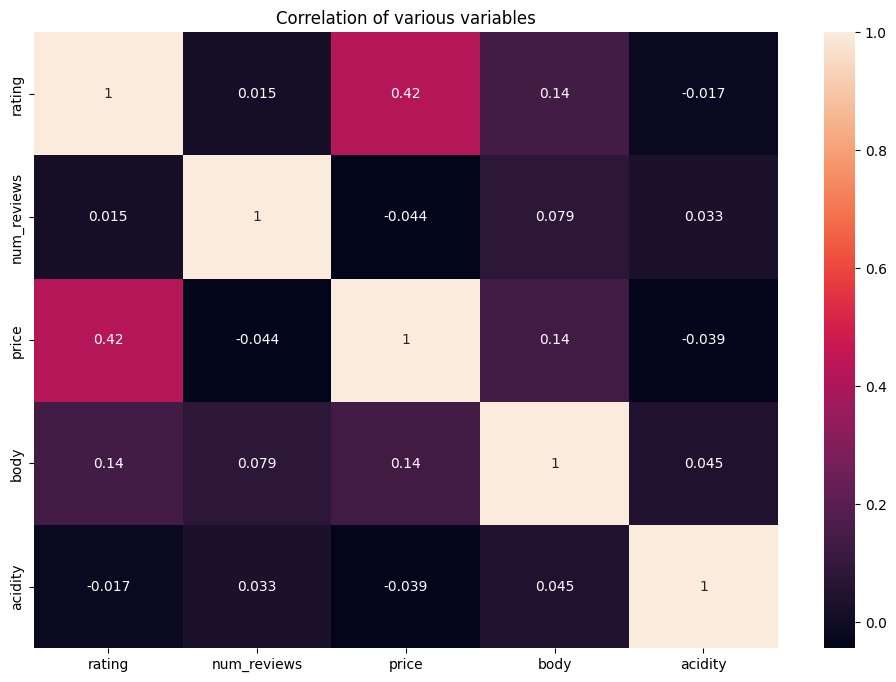

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation of various variables')
plt.show()

Correlation shows degree of linear relationship between variables.It varies 1 from price and ratings have the highest ratings of 42% meaning that they are fairly positive correlated thus when ratings increase, price increase with approximately 50% of the initial increase in ratings. num-reviews and acidity have the lowest positive correlation of 4.4% meaning that number of reviews are lowly affected by the acidity of the wine thus low correlation.

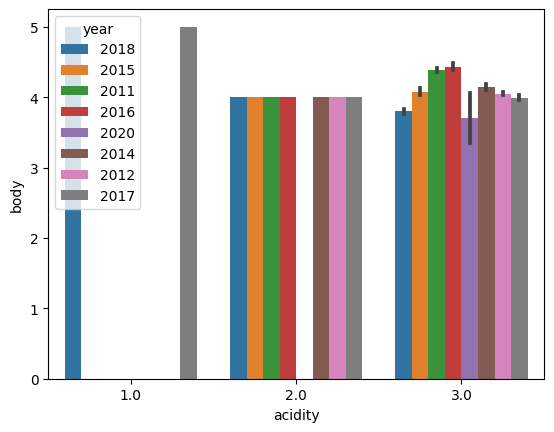

In [24]:
sns.barplot(data=df, x='acidity', y= 'body', hue='year')
plt.xticks()
plt.show()

<Axes: xlabel='rating', ylabel='price'>

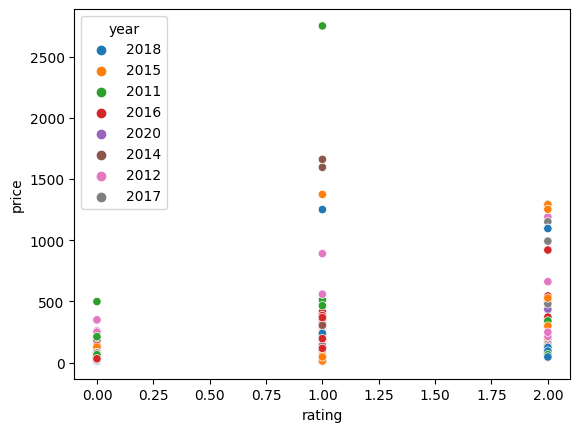

In [25]:
sns.scatterplot(data=df, x="rating", y="price", hue="year")

Convert the String Names of the Classes to Numeric Values.

In [26]:
df['rating'] = df['rating'].replace({'Three stars': 0, 'Four stars': 1, 'Five stars': 2})

Arrange Data into a Features Matrix and Target Vector

In [27]:
# Define features (X) and target (y)
y = df['rating']
X = df.drop(columns = 'rating')


Train Test Split (model validation)

In [28]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0    0.895688
1    0.095281
2    0.009031
Name: rating, dtype: float64

In [30]:
## Check how many samples of each class are present for test
y_test.value_counts(normalize=True)

0    0.877454
1    0.113067
2    0.009479
Name: rating, dtype: float64

#Preprocessing for Machine Learing
Transformers

In [31]:
# Instantiate the transformers
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)
# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Combine the Pipelines and ColumnSelectors into tuples for the ColumnTransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)
# Create the preprocessing ColumnTransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efd6c4c3820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efd6c4c3eb0>)])

##Models


In [32]:
dc = DecisionTreeClassifier()

dc_pipe = make_pipeline(preprocessor, dc)

dc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd6c4c3820>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd6c4c3eb0>)])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [33]:
train_preds = dc_pipe.predict(X_train)
test_preds = dc_pipe.predict(X_test)

print('train')
print(classification_report(y_train, train_preds))

print('test')
print(classification_report(y_test, test_preds))


train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3967
           1       1.00      1.00      1.00       422
           2       1.00      1.00      1.00        40

    accuracy                           1.00      4429
   macro avg       1.00      1.00      1.00      4429
weighted avg       1.00      1.00      1.00      4429

test
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1296
           1       0.72      0.68      0.70       167
           2       0.47      0.50      0.48        14

    accuracy                           0.93      1477
   macro avg       0.72      0.72      0.72      1477
weighted avg       0.93      0.93      0.93      1477



In [34]:
dc_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7efd6c4c3820>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                              

In [35]:
params = {'decisiontreeclassifier__max_depth':range(1,dc.get_depth())}

dc_gs = GridSearchCV(dc_pipe, params).fit(X_train, y_train)

In [36]:
train_preds = dc_gs.predict(X_train)
test_preds = dc_gs.predict(X_test)

print('Train')
print(classification_report(y_train, train_preds))
print('Test')
print(classification_report(y_test, test_preds))

Train
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3967
           1       0.69      0.89      0.78       422
           2       0.96      0.60      0.74        40

    accuracy                           0.95      4429
   macro avg       0.88      0.82      0.83      4429
weighted avg       0.96      0.95      0.95      4429

Test
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1296
           1       0.68      0.83      0.75       167
           2       0.55      0.43      0.48        14

    accuracy                           0.94      1477
   macro avg       0.74      0.74      0.73      1477
weighted avg       0.94      0.94      0.94      1477



Model
KNN Classifier

In [37]:
##Create an instance of the model
knn = KNeighborsClassifier(n_neighbors=1)
##Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd6c4c3820>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd6c4c3eb0>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [38]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [39]:
knn_train_preds[:5]

array([0, 0, 0, 0, 0])

TEST

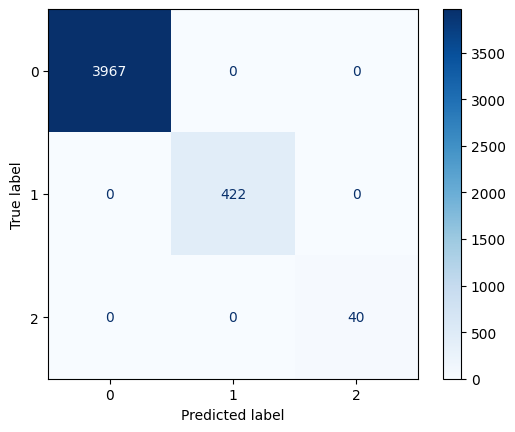

In [56]:
# Calculate the normalized Confusion Reports.
labels = ['Yes', 'No']
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds, cmap='Blues');

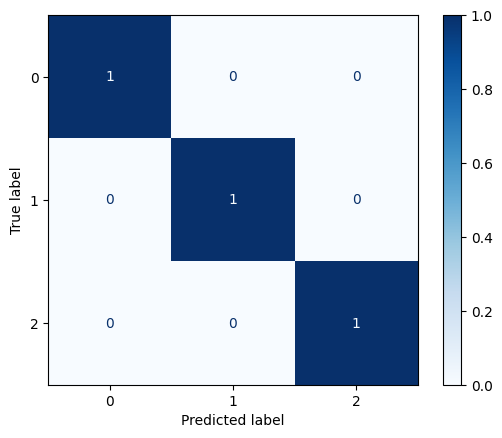

In [57]:
# Display the normalized Confusion Reports.
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds, normalize='true', cmap="Blues");

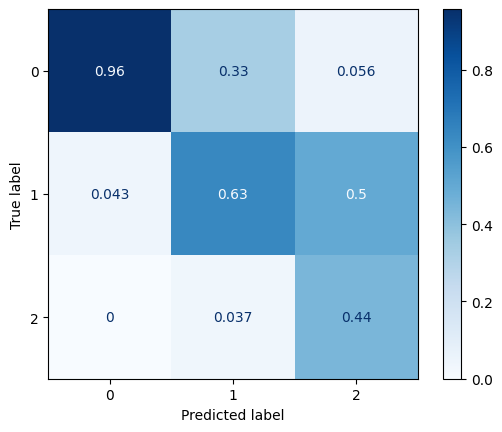

In [58]:
# Calculate the normalized Confusion Reports.

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds, normalize='pred', cmap='Blues');

In [59]:
# Display the normalized Confusion Reports.
print('Test')
print(classification_report(y_test, knn_test_preds))
print('Train')
print(classification_report(y_train, knn_train_preds))

Test
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1296
           1       0.63      0.61      0.62       167
           2       0.44      0.57      0.50        14

    accuracy                           0.92      1477
   macro avg       0.68      0.71      0.69      1477
weighted avg       0.92      0.92      0.92      1477

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3967
           1       1.00      1.00      1.00       422
           2       1.00      1.00      1.00        40

    accuracy                           1.00      4429
   macro avg       1.00      1.00      1.00      4429
weighted avg       1.00      1.00      1.00      4429



Tune the Hypermarameters

In [60]:
#looking at some hyperparameters that seem tunable
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7efd6c4c3820>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                              

In [61]:
# Tune hyperparameters with GridSearchCV

params = {'kneighborsclassifier__n_neighbors': range(1,11), 
          'kneighborsclassifier__weights': ['uniform', 'distance']}

In [62]:
y_train.value_counts(normalize=True)

0    0.895688
1    0.095281
2    0.009031
Name: rating, dtype: float64

In [63]:
# Visualize Accuracy Scores.
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())

#Which scoring method should we use?
knn_gs = GridSearchCV(knn_pipe, params, scoring='f1').fit(X_train, y_train)
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [64]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_gs.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_gs.predict(X_test)

In [65]:
# Classification Report for the Train dataset
# Save the Classification Report
knn_train_report = classification_report(y_train, knn_train_preds)
                                         

# Print the Classification Report
print('Classification Report for Train\n')
print(knn_train_report)

Classification Report for Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3967
           1       1.00      1.00      1.00       422
           2       1.00      1.00      1.00        40

    accuracy                           1.00      4429
   macro avg       1.00      1.00      1.00      4429
weighted avg       1.00      1.00      1.00      4429



In [66]:
# Classification Report for the Test dataset
# Save the Classification Report
knn_test_report = classification_report(y_test, knn_test_preds)
                                        

# Print the Classification Report
print('Classification Report for Test\n')
print(knn_test_report)

Classification Report for Test

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1296
           1       0.63      0.61      0.62       167
           2       0.44      0.57      0.50        14

    accuracy                           0.92      1477
   macro avg       0.68      0.71      0.69      1477
weighted avg       0.92      0.92      0.92      1477



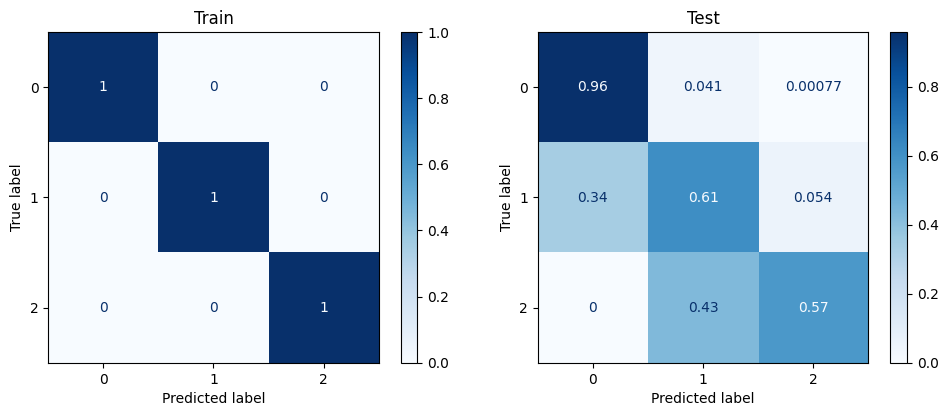

In [67]:
fig, axes = plt.subplots(1,2, figsize=(10,4))


ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
                                        cmap='Blues', normalize='true',
                                         ax=axes[0])

axes[0].set_title('Train')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
                                        cmap='Blues', normalize='true',
                                         ax=axes[1])

axes[1].set_title('Test')
plt.tight_layout()

I choose two models for this situation: K-Nearest neighbors and Decision Tree

The results for the on test are as follow:

K-Nearest Neighbors Classifier




Test


              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1296
           1       0.68      0.83      0.75       167
           2       0.55      0.43      0.48        14

    accuracy                           0.94      1477




DecisionTree Classifier




Test


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1296
           1       0.63      0.61      0.62       167
           2       0.44      0.57      0.50        14

    accuracy                           0.92      1477

Based on this, The best model was the Decision tree, although the accuracy results are really closed the KNearest Neighboors has the highest numbers on precision, recall and f1 score.
And the average is higher as well.